In [1]:
# https://deeplearningcourses.com/c/data-science-natural-language-processing-in-python

import numpy as np
import matplotlib.pyplot as plt

import string
import random
import re
import requests
import os
import textwrap

In [2]:
### create substitution cipher

# one will act as the key, other as the value
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

print(letters1)

true_mapping = {}

# shuffle second set of letters
random.shuffle(letters2)

# populate map
for k, v in zip(letters1, letters2):
    true_mapping[k] = v

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


ord(ch1) mengembalikan representasi angka (kode Unicode) dari karakter ch1. Angka 97 adalah representasi angka (kode Unicode) dari huruf kecil 'a'. Jadi ord(ch1) - 97 mengurangi representasi angka dari ch1 dengan representasi angka huruf 'a' untuk mendapatkan indeks relatif dari huruf dalam alfabet. Dalam hal ini, ch1 diasumsikan sebagai huruf kecil dan ord(ch1) - 97 akan mengembalikan nilai antara 0 hingga 25, yang merepresentasikan indeks dari huruf dalam alfabet.

In [3]:
### the language model

# initialize Markov matrix
M = np.ones((26, 26))

# initial state distribution
pi = np.zeros(26)

# a function to update the Markov matrix
def update_transition(ch1, ch2):
    # ord('a') = 97, ord('b') = 98, ...
    # akan mengembalikan index alfabet
    # contoh a = 97 (unicode a), jadi 97 - 97 = 0, 0 adalah index dari alphabet a

    i = ord(ch1) - 97
    j = ord(ch2) - 97
    M[i,j] += 1

# a function to update the initial state distribution
def update_pi(ch):
    i = ord(ch) - 97
    pi[i] += 1

# get the log-probability of a word / token
def get_word_prob(word):
    # print("word:", word)

    i = ord(word[0]) - 97
    logp = np.log(pi[i]) # menetaplan nilai dari index alphabet dari list pi

    for ch in word[1:]:
        j = ord(ch) - 97
        logp += np.log(M[i, j]) # update prob
        i = j # update j

    return logp

# get the probability of a sequence of words
def get_sequence_prob(words):
    # if input is a string, split into an array of tokens
    if type(words) == str:
        words = words.split()

    logp = 0
    for word in words:
        logp += get_word_prob(word)

    return logp

In [9]:
### create a markov model based on an English dataset
# is an edit of https://www.gutenberg.org/ebooks/2701
# (I removed the front and back matter)

# download the file
if not os.path.exists('moby_dick.txt'):
    print("Downloading moby dick...")
    r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')

    with open('moby_dick.txt', 'w') as f:
        f.write(r.content.decode())

UnicodeEncodeError: 'charmap' codec can't encode character '\ufeff' in position 0: character maps to <undefined>

In [4]:
# for replacing non-alpha characters
regex = re.compile('[^a-zA-Z]')

# load in words
for line in open('moby_dick.txt', 'r', encoding='utf-8'):
    line = line.rstrip()

    # there are blank lines in the file
    if line:
        line = regex.sub(' ', line) # replace all non-alpha characters with space

        # split the tokens in the line and lowercase
        tokens = line.lower().split()

        for token in tokens:
            # update the model

            # first letter
            ch0 = token[0]
            update_pi(ch0)

            # other letters
            for ch1 in token[1:]:
                update_transition(ch0, ch1)
                ch0 = ch1

# normalize the probabilities
pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)

In [5]:
### encode a message

# this is a random excerpt from Project Gutenberg's
# The Adventures of Sherlock Holmes, by Arthur Conan Doyle
# https://www.gutenberg.org/ebooks/1661

original_message = '''I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.
'''

# Away they went, and I was just wondering whether I should not do well
# to follow them when up the lane came a neat little landau, the coachman
# with his coat only half-buttoned, and his tie under his ear, while all
# the tags of his harness were sticking out of the buckles. It hadn't
# pulled up before she shot out of the hall door and into it. I only
# caught a glimpse of her at the moment, but she was a lovely woman, with
# a face that a man might die for.

# My cabby drove fast. I don't think I ever drove faster, but the others
# were there before us. The cab and the landau with their steaming horses
# were in front of the door when I arrived. I paid the man and hurried
# into the church. There was not a soul there save the two whom I had
# followed and a surpliced clergyman, who seemed to be expostulating with
# them. They were all three standing in a knot in front of the altar. I
# lounged up the side aisle like any other idler who has dropped into a
# church. Suddenly, to my surprise, the three at the altar faced round to
# me, and Godfrey Norton came running as hard as he could towards me.

In [6]:
# a function to encode a message
def encode_message(msg):
    # downcase
    msg = msg.lower()

    # replace non-alpha characters
    msg = regex.sub(' ', msg)

    # make the encoded message
    coded_msg = []
    for ch in msg: # Looping per character
        coded_ch = ch # could just be a space
        if ch in true_mapping:
            coded_ch = true_mapping[ch]
        coded_msg.append(coded_ch)

    return ''.join(coded_msg)


encoded_message = encode_message(original_message)
print(encoded_message)

d ukix ebtxyiq qbzx uki ruviiu axq lbtxq  ar d isnifuiq  ukau ukivi zar a mizr dx a eaxi zkdfk vtxr qbzx ow bxi zaee bl uki yavqix  d eixu uki brueivr a kaxq dx vtoodxy qbzx ukidv kbvrir  axq vifidhiq dx isfkaxyi uzbnixfi  a yearr bl kael axq kael  uzb ldeer bl rkay uboaffb  axq ar mtfk dxlbvmaudbx ar d fbteq qirdvi aobtu mdrr aqeiv  ub raw xbukdxy bl kael a qbcix bukiv nibnei dx uki xidykobtvkbbq dx zkbm d zar xbu dx uki eiaru dxuiviruiq  otu zkbri odbyvankdir d zar fbmnieeiq ub edruix ub  


In [7]:
# a function to decode a message

def decode_message(msg, word_map):
    decoded_msg = []
    for ch in msg:
        decoded_ch = ch # could just be a space
        if ch in word_map:
            decoded_ch = word_map[ch]
        decoded_msg.append(decoded_ch)

    return ''.join(decoded_msg)

In [8]:
### run an evolutionary algorithm to decode the message

# this is our initialization point
dna_pool = []
for _ in range(20):
  dna = list(string.ascii_lowercase)
  random.shuffle(dna)
  dna_pool.append(dna)

In [9]:
def evolve_offspring(dna_pool, n_children):
  # make n_children per offspring
  offspring = []

  for dna in dna_pool:
    for _ in range(n_children):
      copy = dna.copy()
      j = np.random.randint(len(copy))
      k = np.random.randint(len(copy))

      # switch
      tmp = copy[j]
      copy[j] = copy[k]
      copy[k] = tmp
      offspring.append(copy)

  return offspring + dna_pool

In [10]:
num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(num_iters):
  if i > 0:
    # get offspring from the current dna pool
    dna_pool = evolve_offspring(dna_pool, 3)

  # calculate score for each dna
  dna2score = {}
  for dna in dna_pool:
    # populate map
    current_map = {}
    for k, v in zip(letters1, dna):
      current_map[k] = v

    decoded_message = decode_message(encoded_message, current_map)
    score = get_sequence_prob(decoded_message)

    # store it
    # needs to be a string to be a dict key
    dna2score[''.join(dna)] = score

    # record the best so far
    if score > best_score:
      best_dna = dna
      best_map = current_map
      best_score = score

  # average score for this generation
  scores[i] = np.mean(list(dna2score.values()))

  # keep the best 5 dna
  # also turn them back into list of single chars
  sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
  dna_pool = [list(k) for k, v in sorted_dna[:5]]

  if i % 200 == 0:
    print("iter:", i, "score:", scores[i], "best so far:", best_score)


iter: 0 score: -2075.1214177204474 best so far: -1689.0576539347767
iter: 200 score: -1210.484328916712 best so far: -1139.2766449185235
iter: 400 score: -1210.833330892918 best so far: -1121.7397377348893
iter: 600 score: -1172.6048552932716 best so far: -1121.7397377348893
iter: 800 score: -1201.3419815193852 best so far: -1121.7397377348893


In [11]:
# use best score
decoded_message = decode_message(encoded_message, best_map)

print("LL of decoded message:", get_sequence_prob(decoded_message))
print("LL of true message:", get_sequence_prob(regex.sub(' ', original_message.lower())))


# which letters are wrong?
for true, v in true_mapping.items():
  pred = best_map[v]
  if true != pred:
    print("true: %s, pred: %s" % (true, pred))

LL of decoded message: -1121.7397377348893
LL of true message: -933.0314936541175
true: c, pred: y
true: g, pred: w
true: h, pred: p
true: i, pred: t
true: j, pred: q
true: k, pred: j
true: m, pred: c
true: n, pred: r
true: p, pred: k
true: q, pred: z
true: r, pred: n
true: s, pred: i
true: t, pred: s
true: v, pred: h
true: w, pred: m
true: y, pred: g
true: z, pred: v


In [12]:
# print the final decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", original_message)

Decoded message:
 t sper lourwed domr spe isnees ard fourd  ai t exkeysed  spas spene
mai a cemi tr a lare mptyp nuri domr bg ore mall of spe wander  t lers
spe oisleni a pard tr nubbtrw domr spetn poniei  ard neyethed tr
exyparwe smokerye  a wlaii of palf ard palf  smo ftlli of ipaw sobayyo
ard ai cuyp trfoncastor ai t yould deitne abous ctii adlen  so iag
rosptrw of palf a dover ospen keokle tr spe retwpbounpood tr mpoc t
mai ros tr spe leais trseneised  bus mpoie btownakptei t mai yockelled
so ltiser so

True message:
 I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was 

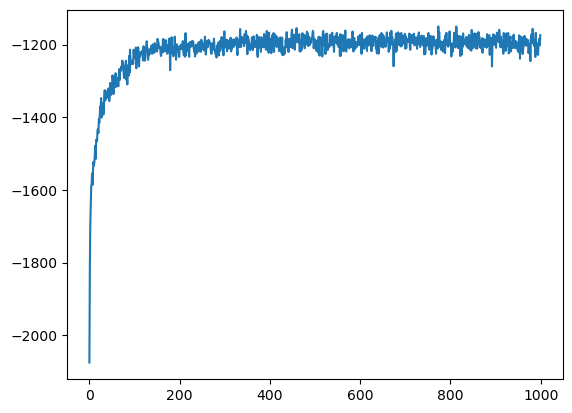

In [13]:
plt.plot(scores)
plt.show()